# Supervised and Unsupervised Learning Practice Case 05 & 06

## Supervised Learning

1. Create classifiers from train.csv data, in order to predict att10 as label based on the
rest of the attributes. Use at least 5 algorithms (k-NN, Decision Tree, Logistic
Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost,
XGBoost, LightGBM, CatBoost, or Stacking). Use AUC for your model evaluation
performance.
2. Choose the best Classifier based on highest AUC and use it for predicting the test.csv
data.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split

## Import Dataset

### Train Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
X = df_train.iloc[:, 0:len(df_train.columns)-1]
y = df_train.iloc[:, len(df_train.columns)-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Because the test.csv data didn't have label, so I split the train dataset and use it as test data, then predict the data using test.csv

### Logistic Regression

In [5]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred_test = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

In [7]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.7956666666666666
0.8115


In [8]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4527
           1       0.63      0.40      0.49      1473

    accuracy                           0.80      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.78      0.80      0.78      6000



In [9]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88      1554
           1       0.62      0.41      0.49       446

    accuracy                           0.81      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.79      0.81      0.80      2000



In [10]:
print(metrics.roc_auc_score(y_train, y_pred_train))
print(metrics.roc_auc_score(y_test, y_pred_test))

0.663074731065969
0.6692767399045426


Eventhough the accuracy is quite good about 80%, but the  precision and especially recall is bad, means that the model predict more negative while in reality it should be positive. This could be caused by imbalanced class.
So, I'll try oversampling the class to balance the class. I used SMOTE to do oversampling

### Oversampling

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) 

In [12]:
logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4527
           1       0.77      0.82      0.79      4527

    accuracy                           0.79      9054
   macro avg       0.79      0.79      0.79      9054
weighted avg       0.79      0.79      0.79      9054



C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.787055445107135
0.7715


In [14]:
auc_log_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_log_test = metrics.roc_auc_score(y_test, y_pred_test)

After oversampling the accuracy is decreased a little but, precision and recall also quite good

### kNN

In [15]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [17]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4527
           1       0.92      0.99      0.95      4527

    accuracy                           0.95      9054
   macro avg       0.95      0.95      0.95      9054
weighted avg       0.95      0.95      0.95      9054



In [18]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.9507400044179368
0.897


In [19]:
auc_knn_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_knn_test = metrics.roc_auc_score(y_test, y_pred_test)

### Decision Tree

In [20]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [22]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4527
           1       0.92      0.99      0.95      4527

    accuracy                           0.95      9054
   macro avg       0.95      0.95      0.95      9054
weighted avg       0.95      0.95      0.95      9054



In [23]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.9507400044179368
0.897


In [24]:
auc_dt_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_dt_test = metrics.roc_auc_score(y_test, y_pred_test)

### Random Forrest

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train  = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4527
           1       1.00      1.00      1.00      4527

    accuracy                           1.00      9054
   macro avg       1.00      1.00      1.00      9054
weighted avg       1.00      1.00      1.00      9054



In [27]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.9985641705323614
0.9785


In [28]:
auc_rf_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_rf_test = metrics.roc_auc_score(y_test, y_pred_test)

### Stacking

In [29]:
from mlxtend.classifier import StackingClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier(5)


# Instantiate the 2nd-layer classifier
clf_meta = RandomForestClassifier()

# Build the Stacking classifier
clf_stack = StackingClassifier(
classifiers=[clf1, clf2, clf3],
meta_classifier=clf_meta,
use_probas=False,
use_features_in_secondary=False)

# Use the fit and predict methods
# like with scikit-learn estimators
clf_stack.fit(X_train, y_train)
y_pred_train = clf_stack.predict(X_train)
y_pred_test = clf_stack.predict(X_test)

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4527
           1       1.00      1.00      1.00      4527

    accuracy                           1.00      9054
   macro avg       1.00      1.00      1.00      9054
weighted avg       1.00      1.00      1.00      9054



In [31]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

1.0
0.9705


In [32]:
auc_stack_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_stack_test = metrics.roc_auc_score(y_test, y_pred_test)

In [33]:
auc_data = {'auc_logistic_regression_train': auc_log_train, 
            'auc_logistic_regression_test': auc_log_test,
           'auc_knn_train' : auc_knn_train,
           'auc_knn_test' : auc_knn_test,
           'auc_dt_train' : auc_dt_train,
           'auc_dt_test' : auc_dt_test,
           'auc_rf_train' : auc_rf_train,
           'auc_rf_test' : auc_rf_test,
           'auc_stack_train' : auc_stack_train,
           'auc_stack_test' : auc_stack_test}
auc_data

{'auc_dt_test': 0.916134263667896,
 'auc_dt_train': 0.9507400044179368,
 'auc_knn_test': 0.916134263667896,
 'auc_knn_train': 0.9507400044179368,
 'auc_logistic_regression_test': 0.7834187486653854,
 'auc_logistic_regression_train': 0.787055445107135,
 'auc_rf_test': 0.9621849588217302,
 'auc_rf_train': 0.9985641705323614,
 'auc_stack_test': 0.9626322350537597,
 'auc_stack_train': 1.0}

Although Stacking much better, but I used Decision Tree because it is much more interpretable

### Test Dataset

In [34]:
df_test = pd.read_csv('test.csv')
df_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.37,0.57,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.49,2,130,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [35]:
predict = rf.predict_proba(df_test)
predict_proba_df = pd.DataFrame(predict[:, 1], columns = ['att10'])
predict_proba_df.head(50)

,att10
0,0.0
1,0.0
2,0.1
3,1.0
4,1.0
5,0.0
6,0.0
7,0.1
8,0.0
9,0.0


In [36]:
#predict_proba_df.to_csv('sample_prediction.csv')

In [37]:
#Merge predict proba

df_merge_predict = pd.concat([df_test, predict_proba_df], axis = 1)
df_merge_predict.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.66,0.62,4,250,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.0
1,0.66,0.50,4,263,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.0
2,0.32,0.74,3,211,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.1
3,0.37,0.57,2,155,3,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1.0
4,0.41,0.49,2,130,3,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1.0


## Unsupervised Learning

* att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person does in his employment)
* att2 is evaluation result (the higher the evaluation result, the better/harder a person works in the company). 

In [38]:
#Merge with test data

df_merge_final = pd.concat([df_train, df_merge_predict])
df_merge_final.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.0
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1.0
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0


In [39]:
df_cluster = df_merge_final.loc[:, ['att1', 'att2']]
df_cluster.head()

,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


### K-means Clustering

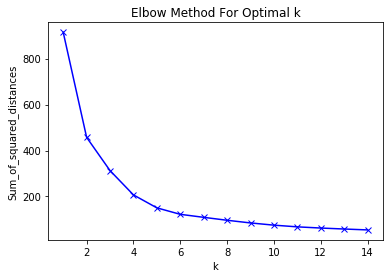

In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    Sum_of_squared_distance.append(km.inertia_)

plt.plot(K, Sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Seems that cluster number 4 is the best, thus I chose k = 4

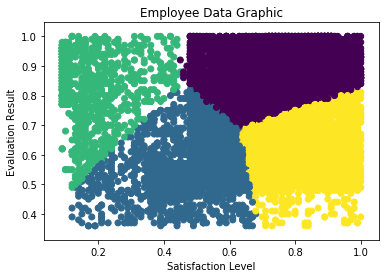

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cluster)
plt.scatter(df_cluster['att1'],df_cluster['att2'], c=kmeans.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

Seems the green one had low satisfaction level but high evaluation result, the blue one had low to medium satisfaction level and evaluation result, the yellow one had high satisfaction level with medium to high evaluation result, and the purple one had medium to high satisfaction level with high evaluation result. Blue cluster was dominated the data

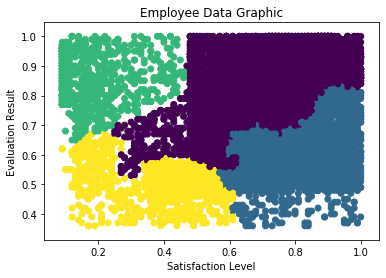

In [52]:
hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hier.fit(df_cluster)
plt.scatter(df_cluster['att1'],df_cluster['att2'], c=hier.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

the green one had low satisfaction level but high evaluation result, the blue one had high satisfaction level and medium evaluation result, the yellow one had low to medium satisfaction level with medium to high evaluation result, and the purple one had medium to high satisfaction level with high evaluation result. Purple cluster was dominated the data

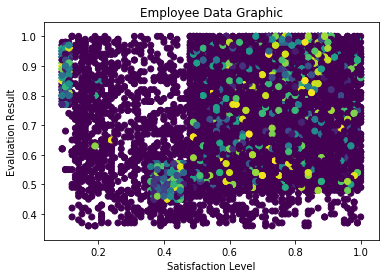

In [59]:
dbscan = DBSCAN(eps=0.00001)
dbscan.fit(df_cluster)
plt.scatter(df_cluster['att1'],df_cluster['att2'], c=dbscan.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

For DBScan it was hard to interpret because seems it was scattered